In [7]:
import pandas as pd
import matplotlib.pyplot as plt
file_path = '/Users/moyuanchen/Documents/thesis/log.pkl'

In [3]:
# Read the pickle file using pandas and print its content
data = pd.read_pickle(file_path)

In [5]:
data

{'v': array([0.81088161, 1.75541496, 2.15034938, ..., 0.54623777, 1.06270671,
        0.24458492]),
 'p': array([0.72985881, 0.30963918, 0.09952936, ..., 1.06003138, 1.66034514,
        1.18009413]),
 'z': array([ 135.07059603,  345.18041207,  450.23532009, ...,  -30.01568801,
        -330.17256807,  -90.04706402]),
 'x': array([[ -75.71838201,   31.1781573 ,   84.62642695, ..., -102.44251684,
           40.08620224, -102.44251684],
        [ 129.16665167,   13.36206741, -111.35056178, ..., -129.16665167,
         -129.16665167,    4.45402247],
        [   4.45402247,  -40.08620224,  102.44251684, ..., -102.44251684,
            4.45402247,  111.35056178]]),
 'y': array([[ -75.71838201,   31.1781573 ,   84.62642695, ..., -102.44251684,
           40.08620224, -102.44251684],
        [ 129.16665167,   13.36206741, -111.35056178, ..., -129.16665167,
         -129.16665167,    4.45402247],
        [   4.45402247,  -40.08620224,  102.44251684, ..., -102.44251684,
            4.45402247,  1

In [8]:
profit = data['profit']

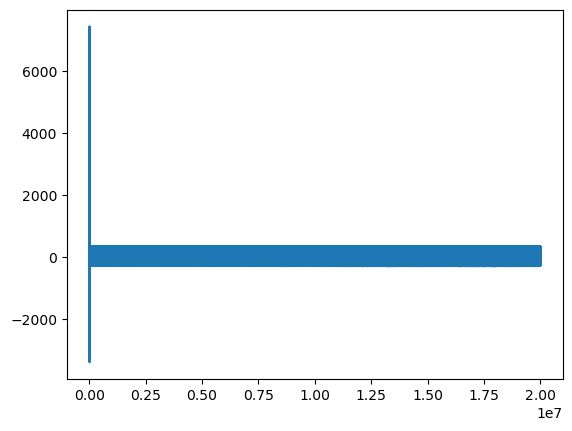

In [22]:
plt.plot(profit[2])

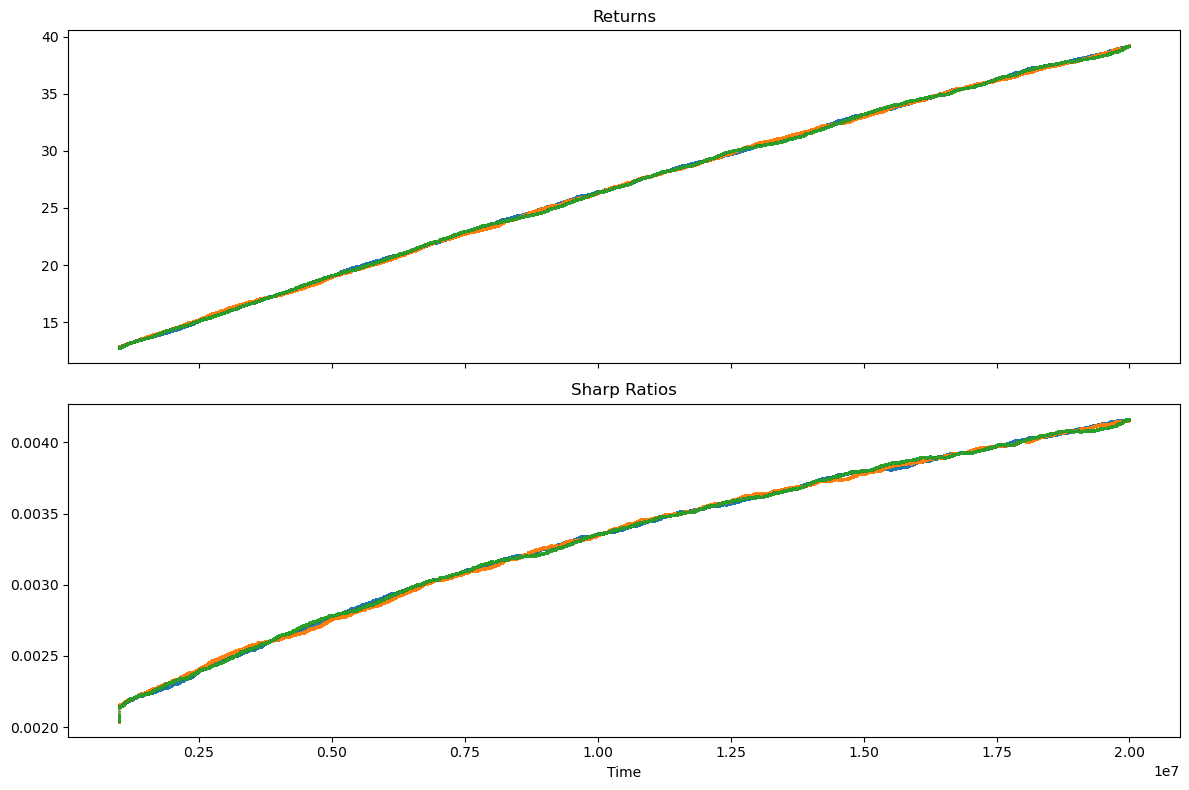

In [24]:
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
window_size = 1000000
for i in range(3):
    profit_series = pd.Series(profit[i])
    returns = profit_series
    returns_mean = returns.rolling(window=window_size).mean()
    profit_var = profit_series.rolling(window=window_size).var()
    sharp_ratio = returns_mean / profit_var
    
    axes[0].plot(returns_mean, '.', markersize=0.5, label=f'Returns {i}')
    axes[1].plot(sharp_ratio, '.', markersize=0.5, label=f'Sharp Ratio {i}')

axes[0].set_title('Returns')
axes[1].set_title('Sharp Ratios')
# axes[0].legend()
# axes[1].legend()
plt.xlabel('Time')
plt.tight_layout()
plt.show()